#Nesse Projeto iremos trabalhar com as seguintes propostas:


##1.   Instalar as bibliotecas a serem utlizadas e a importação do documento
##2.   Realizar uma Análise Textual
##3.   Realizar uma Análise de NER
##4.   Através do Aprendizado de Máquina treinar uma IA encima do texto
##5.   Após isso gerar um novo texto e realizarmos uma acurácia através da similaridade dos textos



##1.   Instalar as bibliotecas a serem utlizadas e a importação do documento

In [ ]:
!pip install spacy
!python -m spacy download pt_core_news_sm
!python -m spacy download pt_core_news_lg


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import spacy
import nltk
import numpy as np
from spacy.lang.pt.examples import sentences
from spacy import displacy
from torch.nn import functional as F
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
with open("/content/TrioEmLaMenor.txt") as f:
    text = f.read()

##2.   Realizar uma Análise Textual




In [ ]:
# Print referente a quantidade de palavras
print(len(text))

14259


In [ ]:
# Print das 1000 primeiras palavras
print(text[:1000])

CAPÍTULO PRIMEIRO
ADAGIO CANTABILE

Maria Regina acompanhou a avó até o quarto, despediu-se e recolheu-se ao seu. A mucama que a servia, apesar da familiaridade que existia entre elas, não pôde arrancar-lhe uma palavra, e saiu, meia hora depois, dizendo que Nhanhã estava muito séria. Logo que ficou só, Maria Regina sentou-se ao pé da cama, com as pernas estendidas, os pés cruzados, pensando.

A verdade pede que diga que esta moça pensava amorosamente em dois homens ao mesmo tempo, um de vinte e sete anos, Maciel — outro de cinqüenta, Miranda. Convenho que é abominável, mas não posso alterar a feição das coisas, não posso negar que se os dois homens estão namorados dela, ela não o está menos de ambos. Uma esquisita, em suma; ou, para falar como as suas amigas de colégio, uma desmiolada. Ninguém lhe nega coração excelente e claro espírito; mas a imaginação é que é o mal, uma imaginação adusta e cobiçosa, insaciável principalmente, avessa à realidade, sobrepondo às coisas da vida outras d

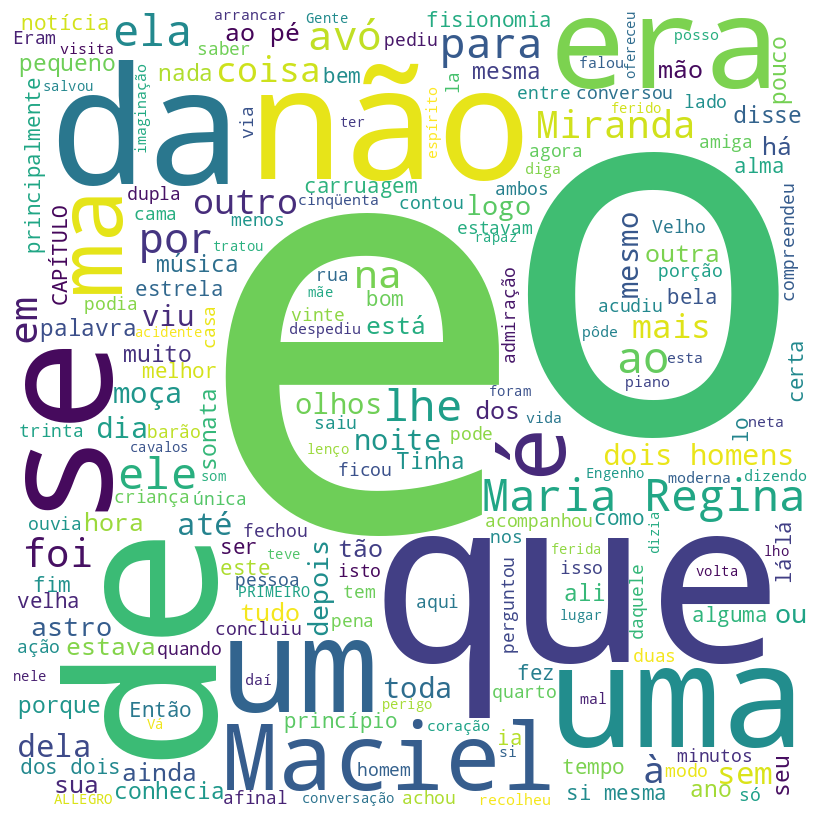

In [ ]:
# Criação da Nuvem de Palavras
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(text)

# Definição de como a imagem será exibida
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Salvar a imagem para exibição
plt.savefig("wordcloud.png")

In [ ]:
# Função para separar e adicionar em um dicionário

def word_meaning(text):
    # carregar o modelo de linguagem em português do spaCy
    nlp = spacy.load("pt_core_news_sm")
    nlp.max_length = 322878

    # analisar o texto usando o spaCy
    doc = nlp(text)

    # criar um dicionário para armazenar as palavras de cada tipo
    words = {"substantivos": [], "verbos": [], "adjetivos": [], "advérbios": [], "outros": []}

    # iterar pelas palavras do texto e adicioná-las ao dicionário
    for token in doc:
        if token.pos_ == "NOUN":
            words["substantivos"].append(token.text)
        elif token.pos_ == "VERB":
            words["verbos"].append(token.text)
        elif token.pos_ == "ADJ":
            words["adjetivos"].append(token.text)
        elif token.pos_ == "ADV":
            words["advérbios"].append(token.text)
        else:
            words["outros"].append(token.text)

    # retornar as listas de palavras para cada tipo de palavra
    return [words["substantivos"], words["verbos"], words["adjetivos"], words["advérbios"], words["outros"]]


In [ ]:
# obter a lista de substantivos
lista_de_substantivos = word_meaning(text)[0]

# obter a lista de verbos
lista_de_verbos = word_meaning(text)[1]

# obter a lista de adjetivos
lista_de_adjetivos = word_meaning(text)[2]

# obter a lista de advérbios
lista_de_advérbios = word_meaning(text)[3]

# obter a lista de outras palavras
lista_de_outras_palavras = word_meaning(text)[4]

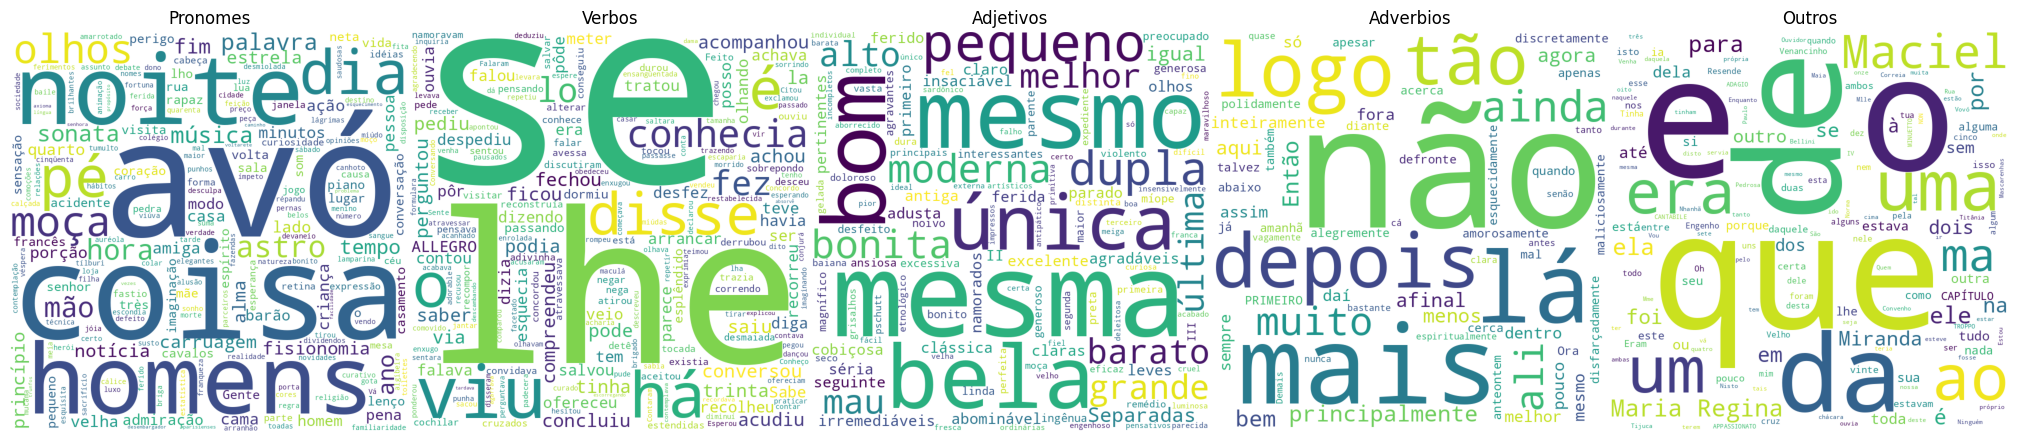

In [ ]:
# Criar as nuvens de palavras

nouncloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_substantivos))
verbcloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_verbos))
adjcloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_adjetivos))
advcloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_advérbios))
othercloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_outras_palavras))


# Definir como as imagens serão exibidas

fig, axs = plt.subplots(1, 5, figsize=(20, 8))

axs[0].imshow(nouncloud)
axs[0].axis("off")
axs[0].set_title('Pronomes')

axs[1].imshow(verbcloud)
axs[1].axis("off")
axs[1].set_title('Verbos')

axs[2].imshow(adjcloud)
axs[2].axis("off")
axs[2].set_title('Adjetivos')

axs[3].imshow(advcloud)
axs[3].axis("off")
axs[3].set_title('Adverbios')

axs[4].imshow(othercloud)
axs[4].axis("off")
axs[4].set_title('Outros')

plt.tight_layout(pad=0)

plt.savefig('nouncloud.png')
plt.savefig('verbcloud.png')
plt.savefig('adjcloud.png')
plt.savefig('advcloud.png')
plt.savefig('othercloud.png')

##3.Realizar uma Análise de NER







In [ ]:
# Analisando Entidades
pln = spacy.load('pt_core_news_lg')
pln.max_length = 1115395
documento = pln(text)

In [ ]:
def word_meaning(text):
    # carregar o modelo de linguagem em português do spaCy
  pln = spacy.load('pt_core_news_lg')
  pln.max_length = 1115395


    # analisar o texto usando o spaCy
  documento = pln(text)

      # criar um dicionário para armazenar as palavras de cada tipo
  words = {"Pessoas": [], "Locais": [], "Organizacoes": [], "Diversos": [], "Outros": []}

      # iterar pelas palavras do texto e adicioná-las ao dicionário
  for entidade in documento.ents:
    if entidade.label_ == "PER":
      words["Pessoas"].append(entidade.text)
    elif entidade.label_ == "LOC":
      words["Locais"].append(entidade.text)
    elif entidade.label_ == "ORG":
      words["Organizacoes"].append(entidade.text)
    elif entidade.label_ == "MISC":
      words["Diversos"].append(entidade.text)
    else:
      words["Outros"].append(entidade.text)
    # retornar as listas de palavras para cada tipo de palavra
  return [words["Pessoas"], words["Locais"], words["Organizacoes"], words["Diversos"], words["Outros"]]



In [ ]:
# obter a lista de entidade pessoa
lista_de_pessoas = word_meaning(text)[0]

# obter a lista de entidade locais
lista_de_locais = word_meaning(text)[1]

# obter a lista de entidade organizações
lista_de_organizacoes = word_meaning(text)[2]

# obter a lista de advérbios
lista_de_diversos = word_meaning(text)[3]


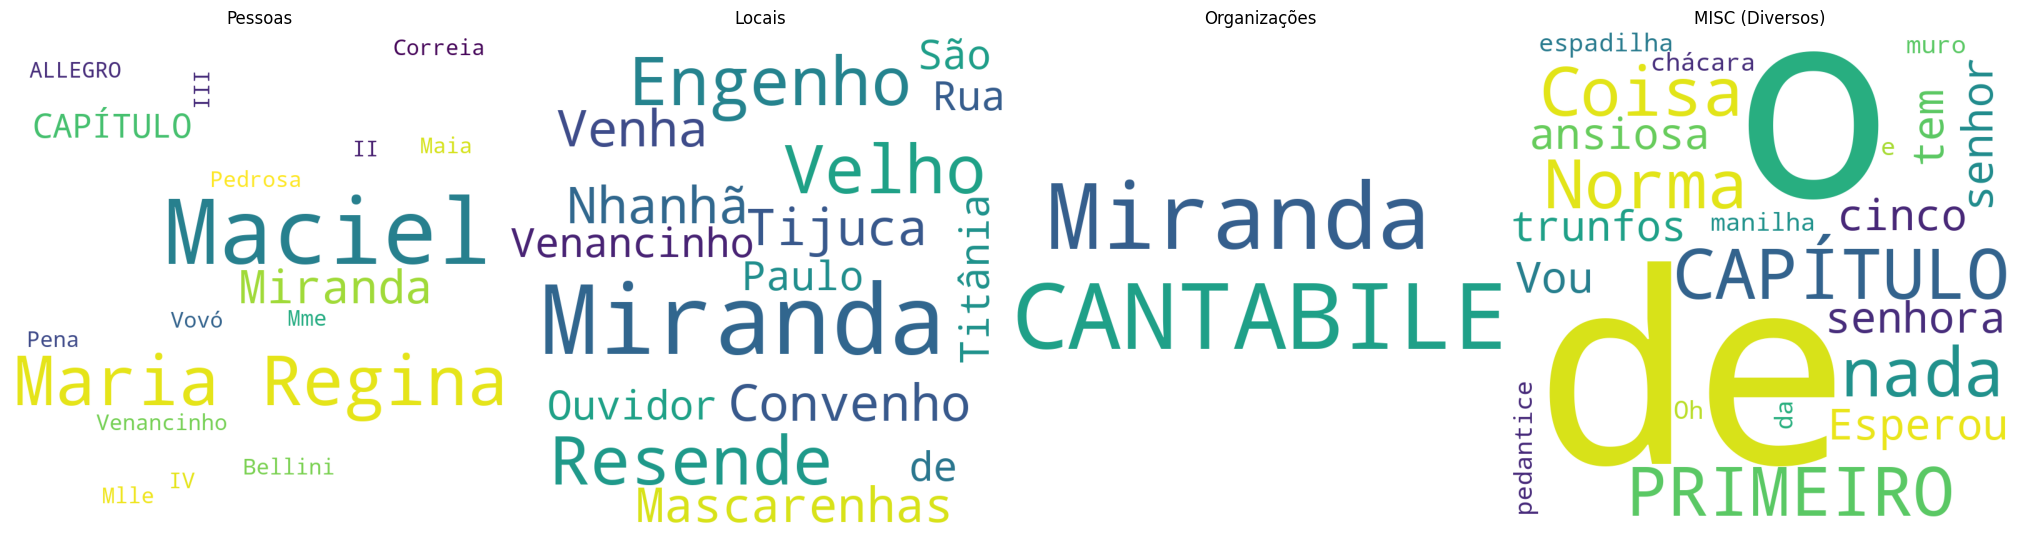

In [ ]:
# Criação das nuvens de palavras

percloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_pessoas))
loccloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_locais))
orgcloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_organizacoes))
misccloud = WordCloud(width=800, height=800, background_color="white").generate(' '.join(lista_de_diversos))


# Definir como as imagens serão exibidas

fig, axs = plt.subplots(1, 4, figsize=(20, 8))

axs[0].imshow(percloud)
axs[0].axis("off")
axs[0].set_title('Pessoas')

axs[1].imshow(loccloud)
axs[1].axis("off")
axs[1].set_title('Locais')

axs[2].imshow(orgcloud)
axs[2].axis("off")
axs[2].set_title('Organizações')

axs[3].imshow(misccloud)
axs[3].axis("off")
axs[3].set_title('MISC (Diversos)')

plt.tight_layout(pad=0)

plt.savefig('percloud.png')
plt.savefig('loccloud.png')
plt.savefig('orgcloud.png')
plt.savefig('misccloud.png')

##4.   Através do Aprendizado de Máquina treinar uma IA encima do texto


In [ ]:
# hyperparametros
batch_size = 16 
block_size = 32 
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------



torch.manual_seed(1337)


# Aqui estão todos os caracteres únicos que ocorrem neste texto.
chars = sorted(list(set(text)))
vocab_size = len(chars)
# Cria um mapeamento de caracteres para inteiros.
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] 
decode = lambda l: ''.join([itos[i] for i in l])

# Divisão de Treinamento e Testes
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # Serão treinados os primeiros 90% do texto
train_data = data[:n]
val_data = data[n:]

# Carregamento dos dados
def get_batch(split):
    # Gerar um pequeno lote de dados de entradas x e alvos y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    
      def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

      def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # Calcular os escores de atenção ("afinidades")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    
    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):

    def __init__(self, n_embd, n_head):
        # n_embd: Dimensão de embedding, n_head: Numero de head`s que queremos
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# Modelo de bigrama simples
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # Cada token lê diretamente os logit do próximo token de uma tabela de consulta.
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # Camada de normalização final
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx e targets são ambos tensores (B, T) de inteiros
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :] # becomes (B, C)
            probs = F.softmax(logits, dim=-1) # (B, C)
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# Imprime o número de parâmetros no modelo
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# Cria o optimizador PyTorch
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # Amostra de um lote de dados
    xb, yb = get_batch('train')

    # Calcula as perdas
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

0.210632 M parameters
step 0: train loss 4.5032, val loss 4.4873
step 100: train loss 2.4947, val loss 2.4575
step 200: train loss 2.3458, val loss 2.3527
step 300: train loss 2.2710, val loss 2.2871
step 400: train loss 2.1866, val loss 2.2346
step 500: train loss 2.1161, val loss 2.1664
step 600: train loss 2.0295, val loss 2.1284
step 700: train loss 1.9407, val loss 2.1088
step 800: train loss 1.8615, val loss 2.0758
step 900: train loss 1.7825, val loss 2.0348
step 1000: train loss 1.7083, val loss 2.0740
step 1100: train loss 1.6312, val loss 2.0886
step 1200: train loss 1.5602, val loss 2.1140
step 1300: train loss 1.4733, val loss 2.1455
step 1400: train loss 1.3808, val loss 2.1543
step 1500: train loss 1.3031, val loss 2.1800
step 1600: train loss 1.2238, val loss 2.2335
step 1700: train loss 1.1601, val loss 2.3080
step 1800: train loss 1.0868, val loss 2.3377
step 1900: train loss 1.0101, val loss 2.4080
step 2000: train loss 0.9652, val loss 2.5140
step 2100: train loss 0.

##5.   Após isso gerar um novo texto e realizarmos uma acurácia através da similaridade dos textos

In [ ]:
context = torch.zeros((2, 2), dtype=torch.long, device=device)
generated_tokens = m.generate(context, max_new_tokens=1000)[0].tolist()
generated_text = decode(generated_tokens)

print("\n-- Texto gerado pelo modelo de linguagem --\n")
print("-" * 40)
print(generated_text[:1000])  # imprime os primeiros 1000 caracteres do texto gerado
print("-" * 40)



-- Texto gerado pelo modelo de linguagem --

----------------------------------------


— Venha, que esquecia a avó e a sala. Maciel. Feito o primeiro curativo, o Maciel acompanhou a moça; pequeno acanhecima o da cruz, que ela levara à casa de um Mascaria Regina; o ferido até à à mesa do Maciel, recordava a absorvê-la. Ve apareciam a falar comoçõe; pequeno achecia. Conhecia o Venseco, e finom um da fasimadivo. Ninuam lho fora a mesma sonata que fez a avó cochilar um pouco) durou cerca de uma hora. Maria Regina conversou alegremente com o pensa aundela, a aífinda; as principalmente claras. Cenheia horaile, e depois imaginando que a criança que ela com o pensa belanícia, friamente; Maciel decidam muito, Maria Regina.

— Esperou-o ansiiu.

Miranda ficou. Era alto era -se pequeno atravessava a princípio. A protícia e acance diu quadivo. A A situação era a mesma. Era a mesma ingular houbl, ado quarroga não vesse da abaróce a admira, e pode ser que por ambas as razões. Era a mesma sonata à 

In [ ]:
# Define as duas strings a serem comparadas
text1 = text
text2 = generated_text

# Tokeniza, remove stop words e lematiza as palavras em cada texto
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('portuguese')
tokens1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text1) if word.lower() not in stop_words]
tokens2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text2) if word.lower() not in stop_words]

# Cria um conjunto de todas as palavras usadas em ambos os textos
all_tokens = list(set(tokens1 + tokens2))

# Cria vetores de frequência para cada texto
freq1 = [tokens1.count(token) for token in all_tokens]
freq2 = [tokens2.count(token) for token in all_tokens]

# Calcula a similaridade de coseno entre os vetores de frequência
similarity = cosine_similarity([freq1], [freq2])[0][0]
print("Similaridade:", similarity)


Similaridade: 0.8275467091287456
